# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import pdb
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

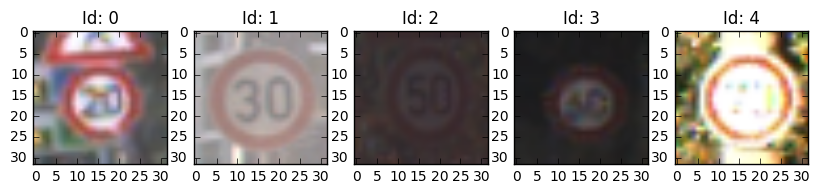

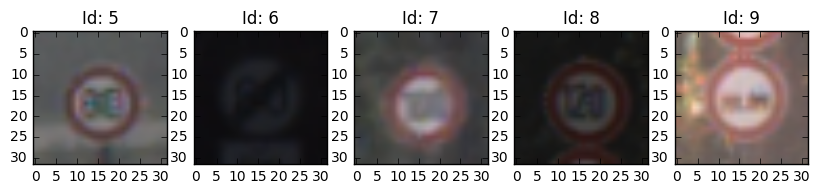

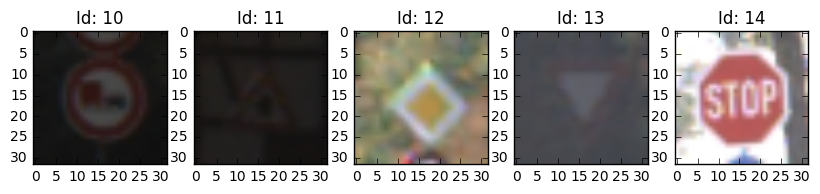

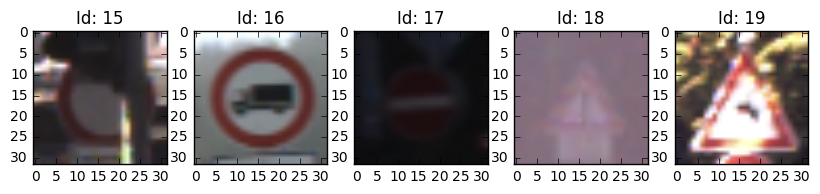

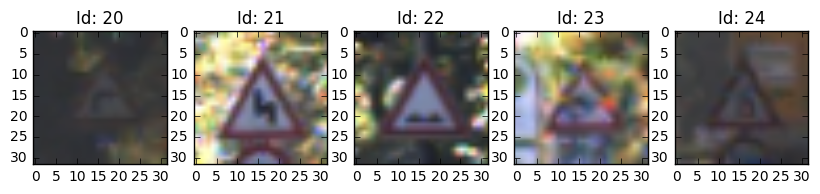

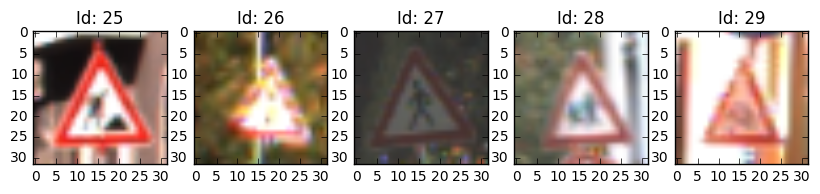

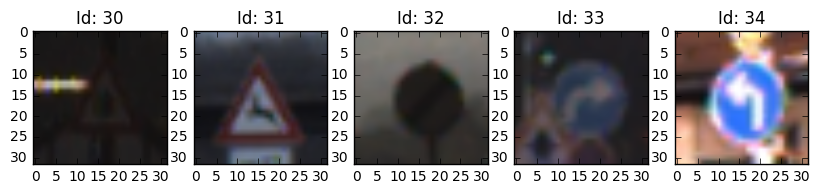

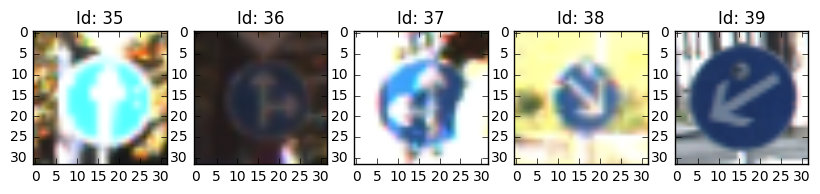

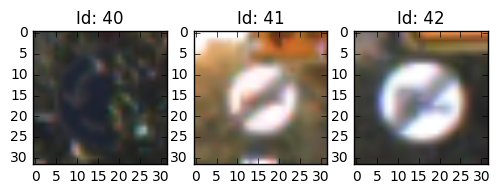

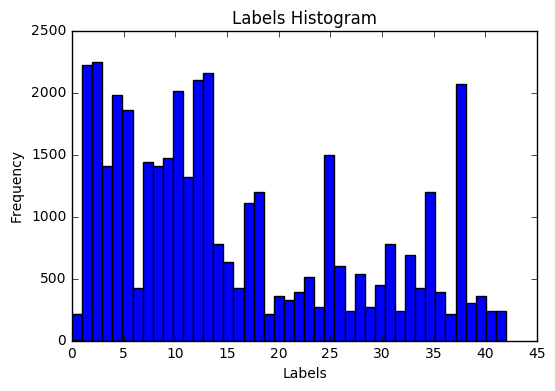

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
# index = random.randint(0, n_train)
# image = X_train[index]
# plt.figure(figsize = (2,2))
# plt.imshow(image)

# Print one example from each label
for i in range(0,n_classes):
    if (i%5 == 0):
        plt.figure(figsize = (10,10))
    plt.subplot(1,5,i%5+1)
    index = np.argwhere(y_train==i)
    image = X_train[index[0][0]]
    plt.imshow(image)
    plt.title("Id: " + str(i))

plt.figure()
plt.hist(y_train, 43)
plt.title("Labels Histogram")
plt.xlabel("Labels")
plt.ylabel("Frequency")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
# Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(\
    X_train, y_train, test_size=0.2, random_state=42)

# Preprocessing:
# Mean subtraction and normalization
mean = np.mean(X_train)
std = np.std(X_train, axis=0)
X_train = X_train - mean
X_train = X_train / std
X_validation = X_validation - mean
X_validation = X_validation / std
X_test = X_test - mean
X_test = X_test / std

# Take only a subset of the data to start with
# X_train = X_train[0:100, :, :, :]
# y_train = y_train[0:100]

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. I shuffled the data. That's necessary to avoid that the order of the data makes an impact on how well the network trains. Otherwise, the training might be biased by the order of the images.

2. I performed a mean subtraction and normalization on the images, based on this article: http://cs231n.github.io/neural-networks-2/#datapre
 (It improved the performance from 95.4% validation accuracy to 97.1%). This preprocessing had to be done after I split the data into training and validation data, according to the article.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the training data into training and validation data, with a test size of 20% from the original training size. I left the test data as it was imported from the original data set.

If I were to create additional data in the future, I would use the technique as described by Vivek Yadav: https://carnd-forums.udacity.com/display/CAR/Project+2+%28unbalanced+data%29+Generating+additional+data+by+jittering+the+original+image

In [6]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def Linear(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Input = 32x32x3. Output = 28x28x6.
    # Layer 2: Input = 14x14x6, Output = 10x10x16.
    # Layer 3: Fully Connected. Input = 400. Output = 500.
    # Layer 4: Fully Connected. Input = 500. Output = 43 (n_classes).
    layer_depth = {
        'layer_1': 6,
        'fully_connected_1': n_classes
    }

    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            shape=(5, 5, 3, layer_depth['layer_1']), mean=mu, stddev=sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal(
            shape=(3072, layer_depth['fully_connected_1']), mean=mu, stddev=sigma))
    }

    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1']))
    }                             

    # Flatten. Input = 32x32x3. Output = 3072.
    layer_1 = tf.contrib.layers.flatten(x)
    print('output shape should be 3072:')
    print(layer_1.get_shape())
    
    # Layer 5: Fully Connected. Input = 3072. Output = 43.
    logits = tf.add(tf.matmul(layer_1, weights['fully_connected_1']),
                biases['fully_connected_1'])
    print('output shape should be 43:')
    print(logits.get_shape())
    print(logits)
    
    return logits


def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Input = 32x32x3. Output = 28x28x6.
    # Layer 2: Input = 14x14x6, Output = 10x10x16.
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    layer_depth = {
        'layer_1': 6,
        'layer_2': 16,
        'fully_connected_1': 120,
        'fully_connected_2': 84,
        'fully_connected_3': n_classes
    }
    
    # Layer 1: Input = 32x32x3. Output = 28x28x6.
    # Layer 2: Input = 14x14x6, Output = 10x10x16.
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            shape=(5, 5, 3, layer_depth['layer_1']), mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal(
            shape=(5, 5, layer_depth['layer_1'], layer_depth['layer_2']), mean=mu, stddev=sigma)),
        'fully_connected_1': tf.Variable(tf.truncated_normal(
            shape=(400, layer_depth['fully_connected_1']), mean=mu, stddev=sigma)),
        'fully_connected_2': tf.Variable(tf.truncated_normal(
            shape=(layer_depth['fully_connected_1'], layer_depth['fully_connected_2']),
        mean=mu, stddev=sigma)),
        'fully_connected_3': tf.Variable(tf.truncated_normal(
            shape=(layer_depth['fully_connected_2'], layer_depth['fully_connected_3']), 
        mean=mu, stddev=sigma))
    }
    
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
        'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
        'fully_connected_3': tf.Variable(tf.zeros(layer_depth['fully_connected_3']))
    }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    print('input shape should be 32x32x3:')
    print(x.get_shape())
    stride = 1
    layer_1 = tf.nn.conv2d(x, weights['layer_1'], strides=[1, stride, stride, 1],
                  padding='VALID')
    layer_1 = tf.nn.bias_add(layer_1, biases['layer_1'])
    print('output shape should be 28x28x6:')
    print(layer_1.get_shape())

    # TODO: Activation.
    layer_1 = tf.nn.relu(layer_1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k = 2
    layer_1 = tf.nn.max_pool(layer_1, ksize=[1, k, k, 1], strides=[1, k, k, 1], 
                   padding='SAME')
    print('output shape should be 14x14x6:')
    print(layer_1.get_shape())

    # TODO: Layer 2: Convolutional. Input = 14x14x6, Output = 10x10x16.
    stride = 1
    layer_2 = tf.nn.conv2d(layer_1, weights['layer_2'],
                     strides=[1, stride, stride, 1],
                    padding='VALID')
    layer_1 = tf.nn.bias_add(layer_2, biases['layer_2'])
    print('output shape should be 10x10x16:')
    print(layer_1.get_shape())
    
    # TODO: Activation.
    layer_2 = tf.nn.relu(layer_2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k = 2
    layer_2 = tf.nn.max_pool(layer_2, ksize=[1, k, k, 1],
                             strides=[1, k, k, 1], padding='VALID')
    print('output shape should be 5x5x16:')
    print(layer_2.get_shape())
                             

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer_2 = tf.contrib.layers.flatten(layer_2)
    print('output shape should be 400:')
    print(layer_2.get_shape())
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(layer_2, weights['fully_connected_1']),
                biases['fully_connected_1'])
    print('output shape should be 120:')
    print(fc1.get_shape())
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
                             
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['fully_connected_2']),
                biases['fully_connected_2'])
    print('output shape should be 84:')
    print(fc2.get_shape())
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    logits = tf.add(tf.matmul(fc2, weights['fully_connected_3']),
                biases['fully_connected_3'])
    print('output shape should be 43:')
    print(logits.get_shape())
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I have used the architecture from LeNet-5:

#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

#### Architecture
**Layer 1: Convolutional.** The output shape is 28x28x6.

**Activation.** RELU activation function.

**Pooling.** The output shape is 14x14x6.

**Layer 2: Convolutional.** The output shape is 10x10x16.

**Activation.** RELU activation function.

**Pooling.** The output shape is 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** This layer has 120 outputs.

**Activation.** RELU activation function.

**Layer 4: Fully Connected.** This layer has 84 outputs.

**Activation.** RELU activation function.

**Layer 5: Fully Connected (Logits).** This layer has 43 outputs.

#### Output
Return the result of the 2nd fully connected layer.

**Features and Labels**

In [7]:
# Later: use epochs 10 and batch 128?
EPOCHS = 20
BATCH_SIZE = 200

# x is a placeholder for a batch of input images
# y is a placeholder for a batch of output labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
# One-hot encode the labels
one_hot_y = tf.one_hot(y,  n_classes)

**Training Pipeline**

In [8]:
### Train your model here.
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

input shape should be 32x32x3:
(?, 32, 32, 3)
output shape should be 28x28x6:
(?, 28, 28, 6)
output shape should be 14x14x6:
(?, 14, 14, 6)
output shape should be 10x10x16:
(?, 10, 10, 16)
output shape should be 5x5x16:
(?, 5, 5, 16)
output shape should be 400:
(?, 400)
output shape should be 120:
(?, 120)
output shape should be 84:
(?, 84)
output shape should be 43:
(?, 43)


**Model Evaluation**

Evaluate how well your model performs based on loss & accuracy.

In [85]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
softmax = tf.nn.softmax(logits)
top5 = tf.nn.top_k(softmax, 5)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    
def get_prediction_array(X_data, y_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predictions = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
        predictions.append(prediction)
    return predictions

def get_pred_prob(X_data, y_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    probs = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        prob = sess.run(top5, feed_dict={x: batch_x, y: batch_y})
        probs.append(prob)
    return probs

**Train the Model**

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss & accuracy of the validation set.

Save the model after training.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    accuracy = []
    loss = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            current_loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            loss.append(current_loss)
            
        validation_accuracy = evaluate(X_validation, y_validation)
        current_loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Loss = {:.3f}".format(current_loss))
        print()
        loss.append(current_loss)
        accuracy.append(validation_accuracy)
        
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'trafficSignClassifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.798
Loss = 0.714

EPOCH 2 ...
Validation Accuracy = 0.902
Loss = 0.320

EPOCH 3 ...
Validation Accuracy = 0.936
Loss = 0.177

EPOCH 4 ...
Validation Accuracy = 0.954
Loss = 0.168

EPOCH 5 ...
Validation Accuracy = 0.959
Loss = 0.067

EPOCH 6 ...
Validation Accuracy = 0.964
Loss = 0.079

EPOCH 7 ...
Validation Accuracy = 0.965
Loss = 0.043

EPOCH 8 ...
Validation Accuracy = 0.968
Loss = 0.038

EPOCH 9 ...
Validation Accuracy = 0.969
Loss = 0.033

EPOCH 10 ...
Validation Accuracy = 0.973
Loss = 0.022

EPOCH 11 ...
Validation Accuracy = 0.973
Loss = 0.019

EPOCH 12 ...
Validation Accuracy = 0.976
Loss = 0.016

EPOCH 13 ...
Validation Accuracy = 0.978
Loss = 0.011

EPOCH 14 ...
Validation Accuracy = 0.973
Loss = 0.069

EPOCH 15 ...
Validation Accuracy = 0.978
Loss = 0.017

EPOCH 16 ...
Validation Accuracy = 0.978
Loss = 0.004

EPOCH 17 ...
Validation Accuracy = 0.974
Loss = 0.035

EPOCH 18 ...
Validation Accuracy = 0.975
Loss = 0.030

EPOCH 

[0.79762815156781952, 0.90155572296557029, 0.93611323603924612, 0.95371077900424173, 0.95868400878609517, 0.96403978357993658, 0.96505993329514905, 0.96786534071759101, 0.96901301059513734, 0.97283856469251406, 0.97271105544477721, 0.97640909573400059, 0.9783218667021335, 0.97347616386243319, 0.9783218712625501, 0.97793931311656246, 0.97398624369089348, 0.97462382945318793, 0.97653660498173744, 0.98036216515966956]


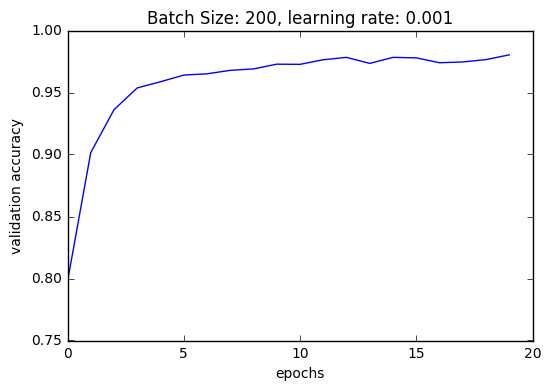

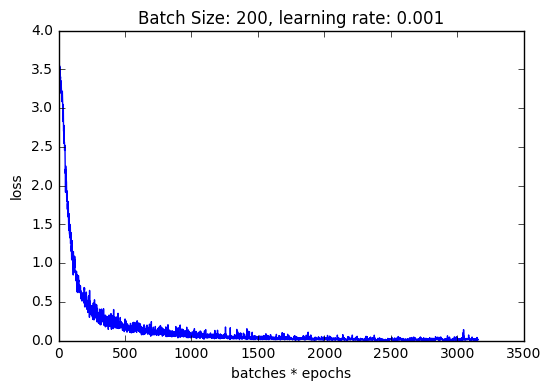

In [12]:
print(accuracy)
# print(loss)
plt.figure()
plt.plot(accuracy)
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.title('Batch Size: ' + str(BATCH_SIZE) + ', learning rate: ' + str(rate))
plt.figure()
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('batches * epochs')
plt.title('Batch Size: ' + str(BATCH_SIZE) + ', learning rate: ' + str(rate))

In [13]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trafficSignClassifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.918


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I'm using the Adam optimizer as suggested in the course. The Adam optimizer uses the adam algorithm to minimize the loss function similarly to what the Stochastic Gradient Descent (SGD) does. It is a little more sophisticated than the SGD, so it's a good default choice for an optimizer. 
I found this great article explaining how the adam optimizer works:
http://sebastianruder.com/optimizing-gradient-descent/index.html#minibatchgradientdescent

Hyperparameters:
* EPOCHS: 20
* Batch Size: 200
* Learning rate alpha: 0.001

Hyperparameters to initialize weights randomly:
* mu = 0
* sigma = 0.1

I chose EPOCHS, batch size and learning rate based on trial and error, where I found that larger batch sizes tend to give more stable results. Too big batch sizes on the other hand tend to give low validation accuracy.
The distribution of the weights were chosen as for the LeNet optimizer. The choice has shown to work well.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Initially, I tried to apply the LeNet architecture to the traffic sign problem. It is a similar problem, except for that the traffic signs are more detailed and in color. Somehow, I ended up with very low verification accuracy and implemented therefore a linear model to test hyperparameters.

While I was playing with the hyperparameters I found an interesting correlation between batch size and stability of the validation accuracy and loss. It helped me develop an intuition for the hyperparameters.

Eventually I tried to implement the LeNet architecture once more and managed to get a validation accuracy of 95%. I wanted to improve that, so I performed a mean subtraction and normalization on the images, which brought me to a validation accuracy of 97%. With a little tweaking of the hyperparameters, I wound up with a 98% validation accuracy.

The test accuracy is 90.9%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [84]:
import cv2
### Load the images and plot them here.
# image = tf.image.decode_png("real-traffic-signs/1")
# resized_image = tf.image.resize_images(image, [32, 32])
# print(resized_image)
# plt.figure()
# plt.imshow(resized_image)
imagesTogether = []
labels = [16, 5, 9, 12, 1, 2, 4, 7, 8, 6, 27, 1, 6, 9, 10, 11, 13, 17, 17, 
            15, 21, 20, 40, 21, 22, 24, 30, 31, 28, 14, 11, 38, 18, 23, 25, 25, 29, 23]
number_test_images = 38

# Loop over all images and create an array 
for image_number in range(1,number_test_images+1):
    image = plt.imread("test-traffic-signs/" + str(image_number) + ".png")
    image = cv2.resize(image, (32, 32))
    image = image[:,:,:3]
    imagesTogether.append(image)

print(len(imagesTogether)) # Should be 5 if I'm taking 5 input images
imagesTogetherNP = np.asarray(imagesTogether)
print(imagesTogetherNP.shape) # (numberOfImages, 32, 32, 3) as required
# Classify the images and check whether they were classified correctly.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trafficSignClassifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_accuracy = evaluate(imagesTogetherNP, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    predictions = get_prediction_array(imagesTogetherNP, labels)
    print(predictions)

38
(38, 32, 32, 3)
Test Accuracy = 0.553
[array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False], dtype=bool)]


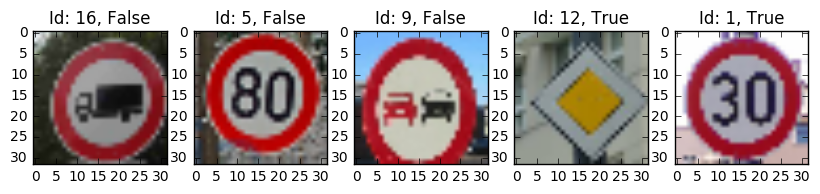

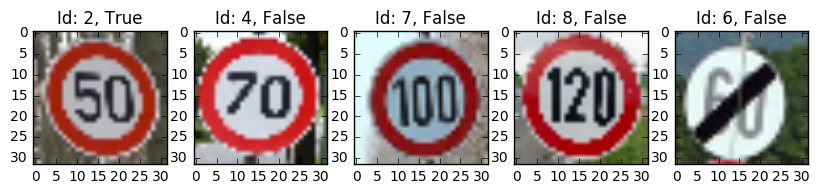

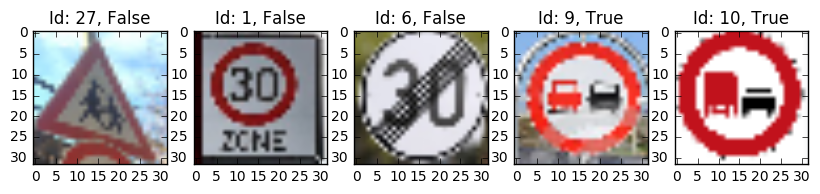

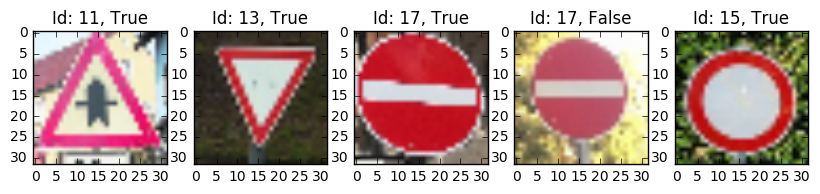

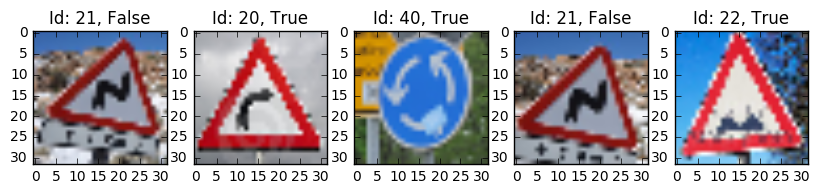

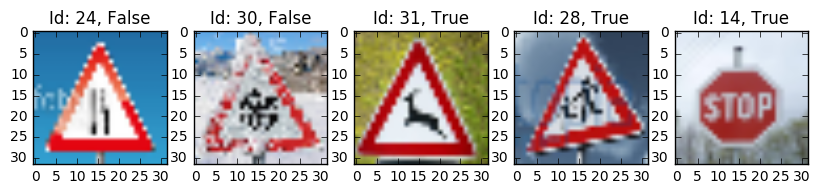

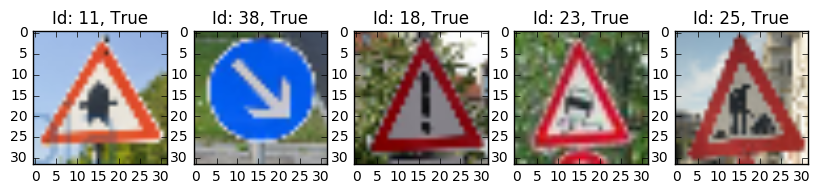

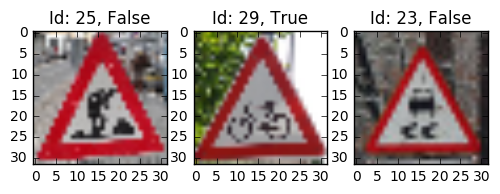

In [43]:
### Run the predictions here.
# Print every test example with id and if it was correctly predicted
number_test_images = 38
for i in range(0,number_test_images):
    if (i%5 == 0):
        plt.figure(figsize = (10,10))
    plt.subplot(1,5,i%5+1)
    image = imagesTogether[i]
    plt.imshow(image)
    plt.title("Id: " + str(labels[i]) + ", " + str(predictions[0][i]))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
* I printed the images and whether they were correctly classified or not. 
Looking at the images, there are only a few that should or could obviously be classified wrong. Good examples are number 11 and 12, where the traffic sign is obviously heavily skewed or contains extra information (though I'd guess the classifier should have ignored that).
* Examples 18 and 19 are interesting, they both contain the same sign, but example 19 has more tree around it than example 18. The first one was classified correctly, whereas the second one was classified wrong. It indicates that my classifier is not invariant to the position of the sign within the image.
* Example 27 is obscured by snow which might make classification more difficult.

This might be improved by skewing and jittering the training data.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The test accuracy of the new signs is 55.3%, whereas the test accuracy on the given dataset is 90.9%.

In [86]:
### Visualize the softmax probabilities here.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('trafficSignClassifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    probabilities = get_pred_prob(imagesTogetherNP, labels)    

/Users/kasiunia/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


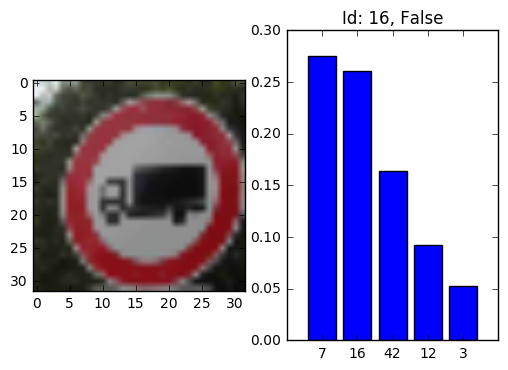

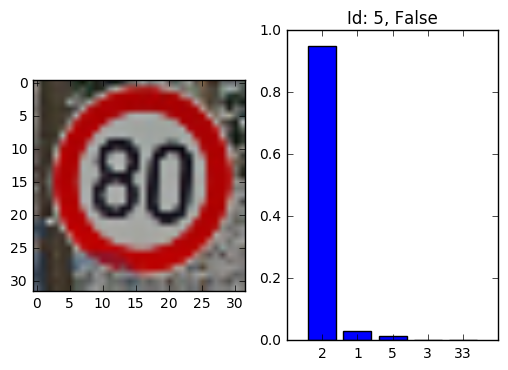

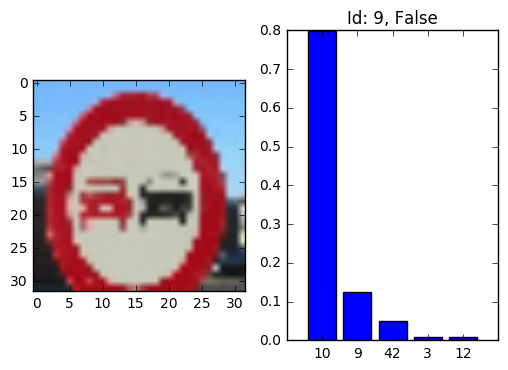

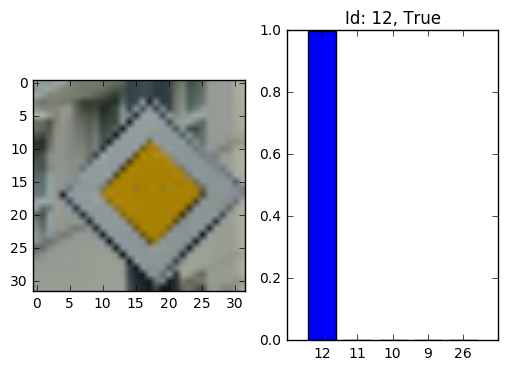

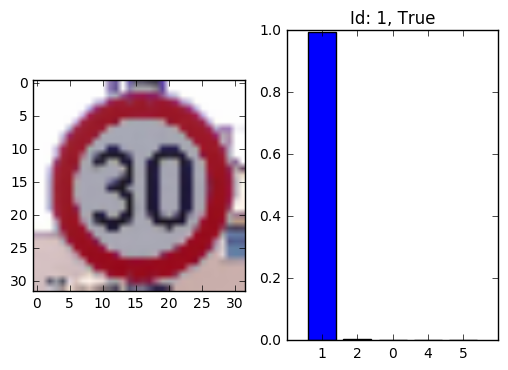

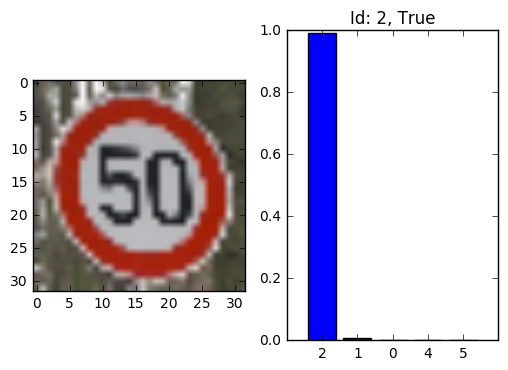

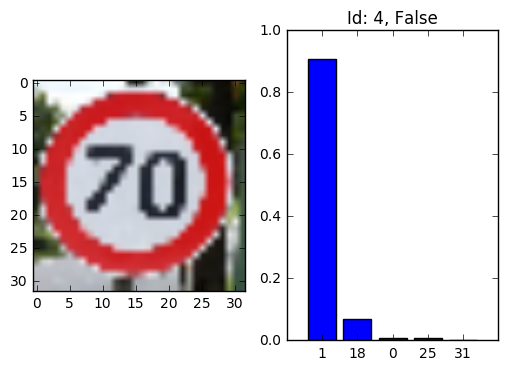

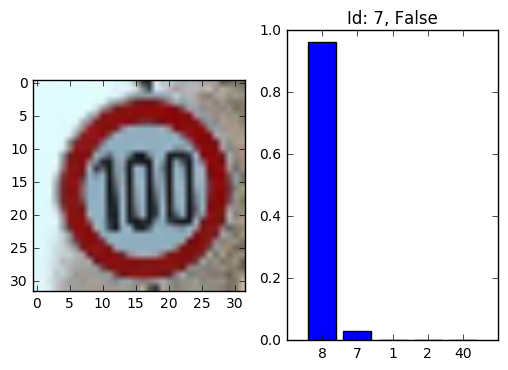

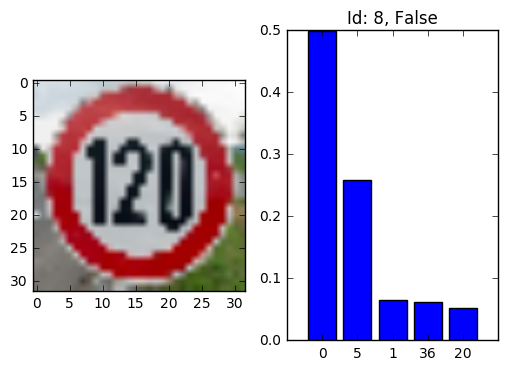

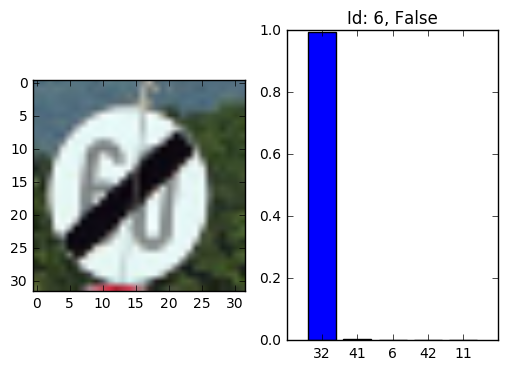

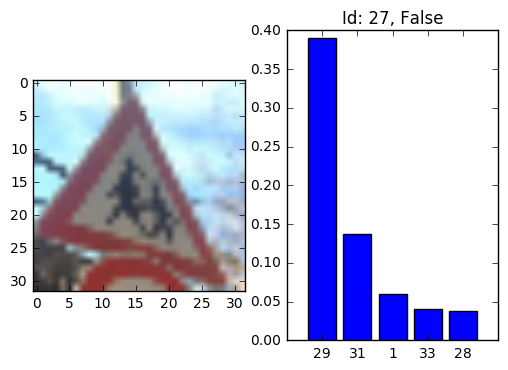

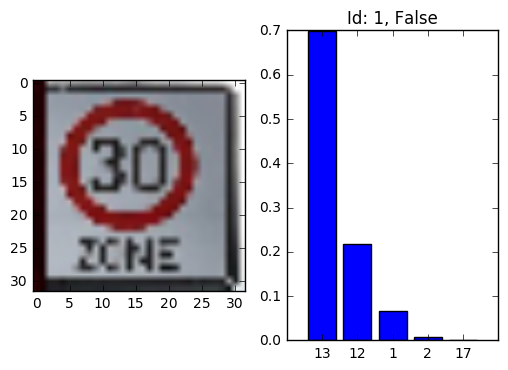

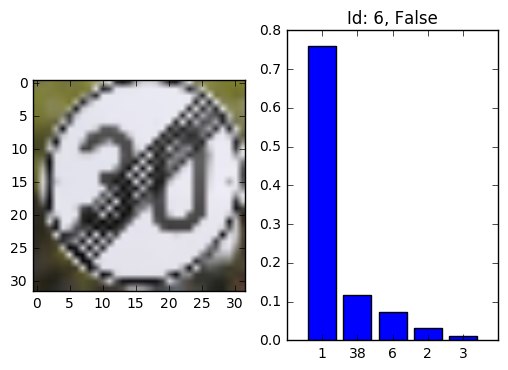

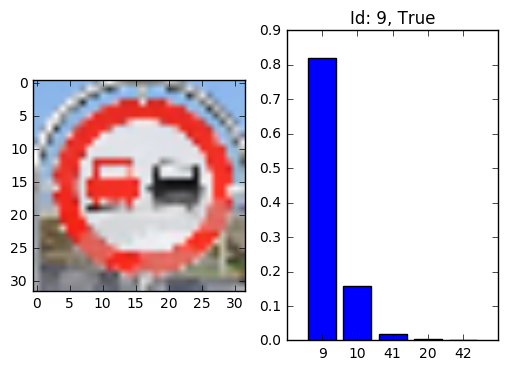

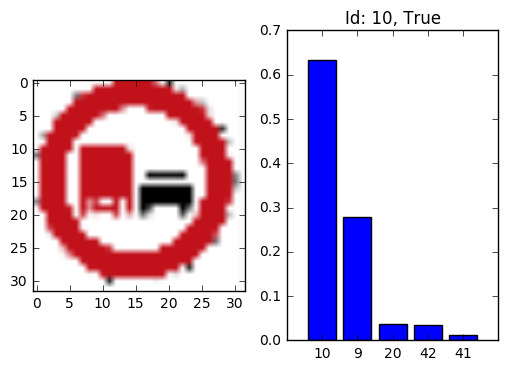

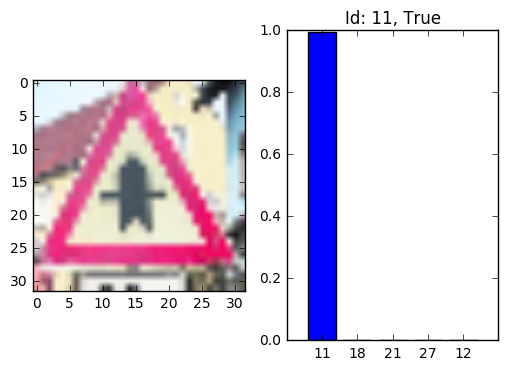

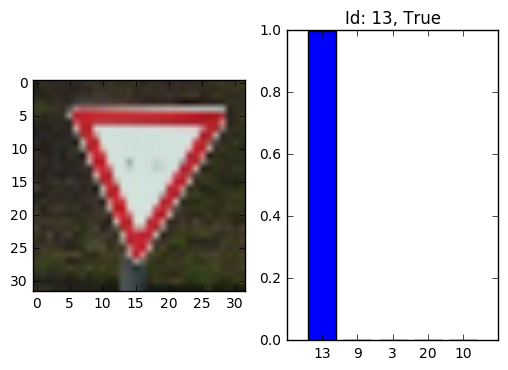

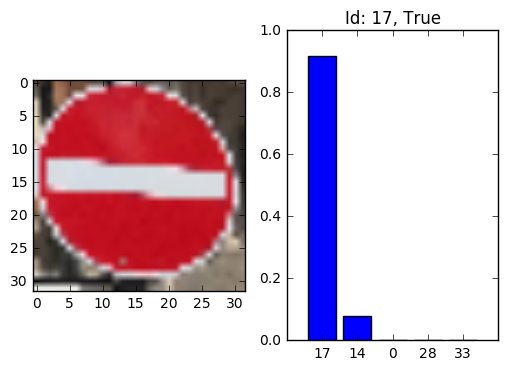

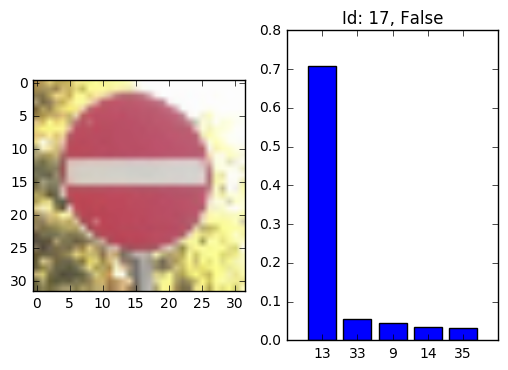

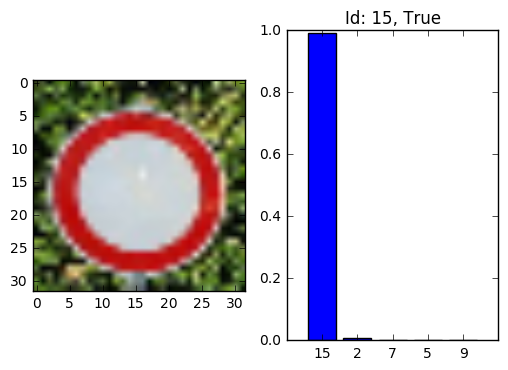

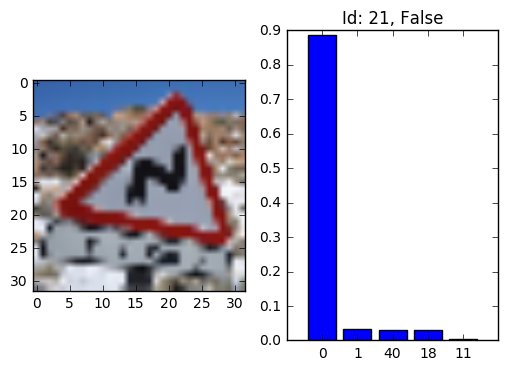

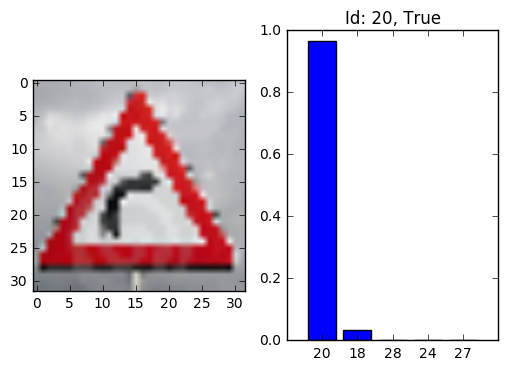

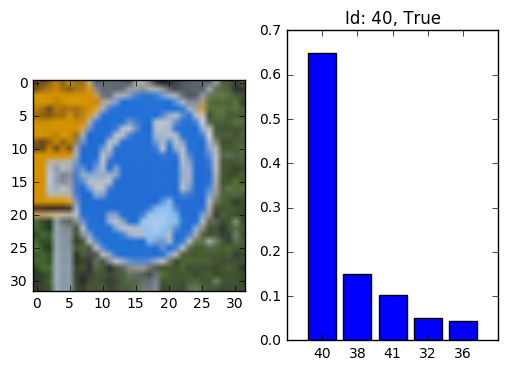

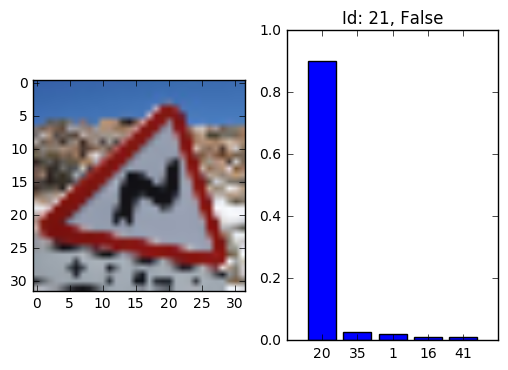

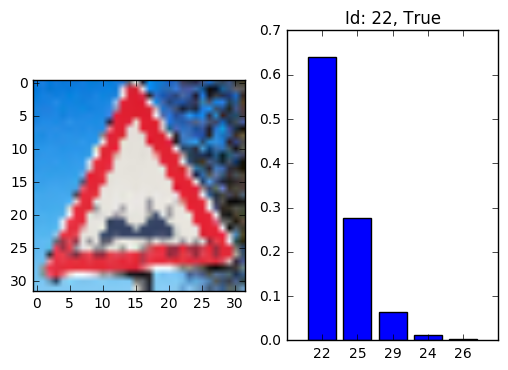

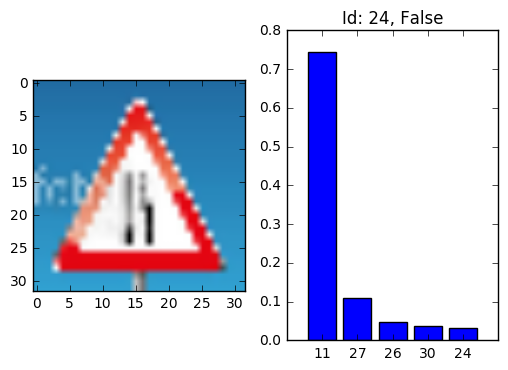

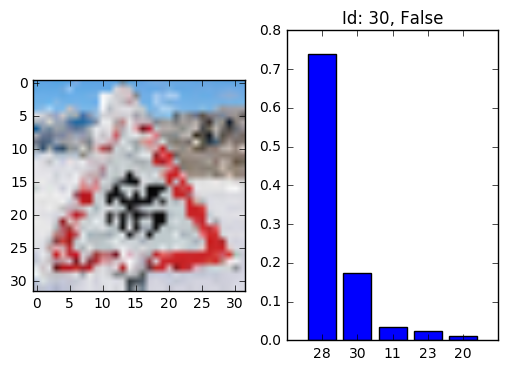

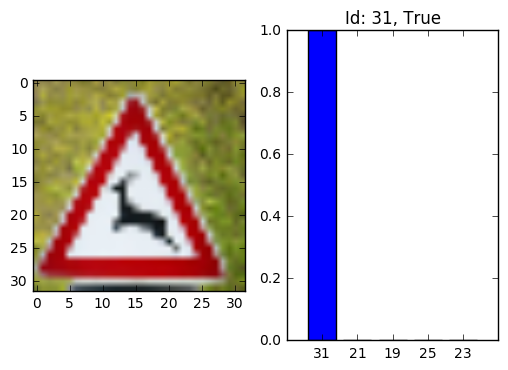

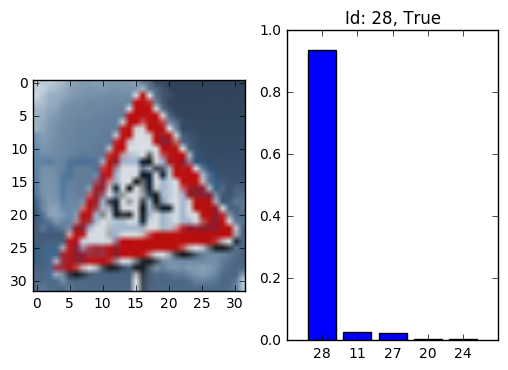

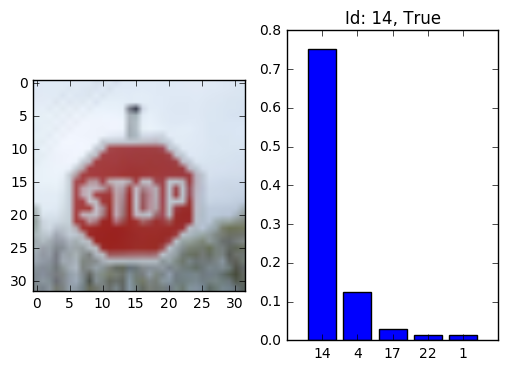

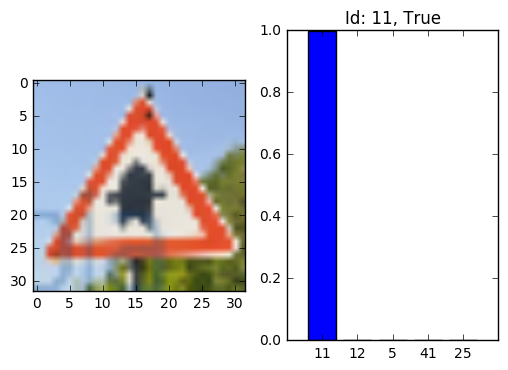

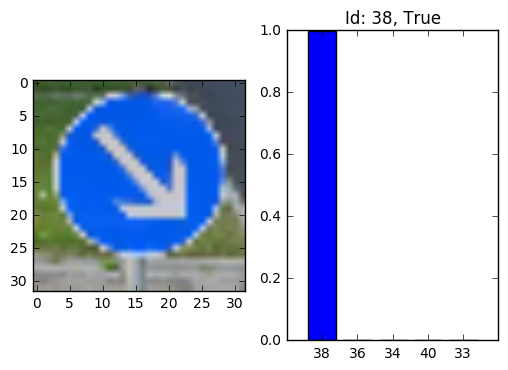

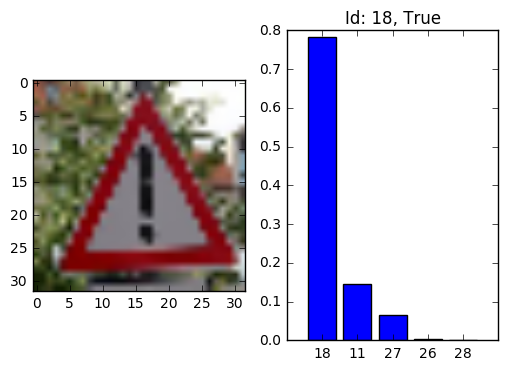

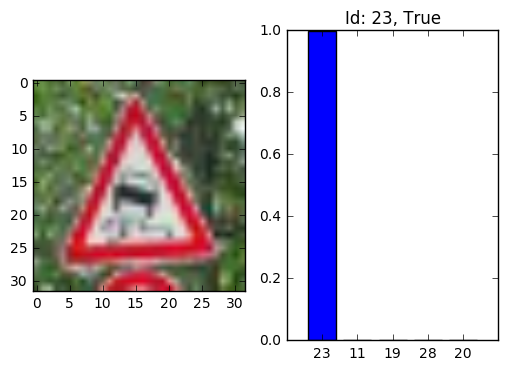

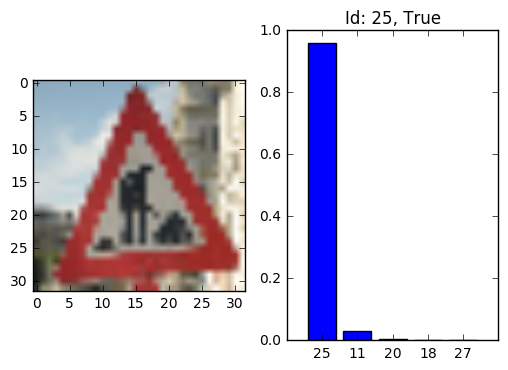

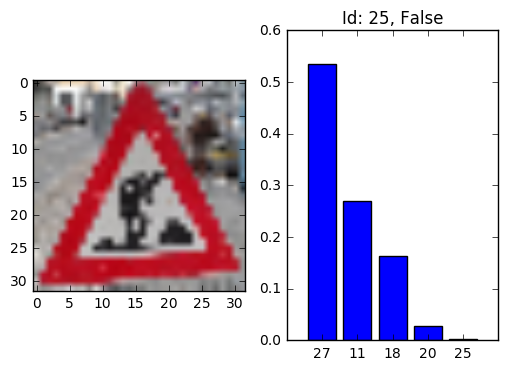

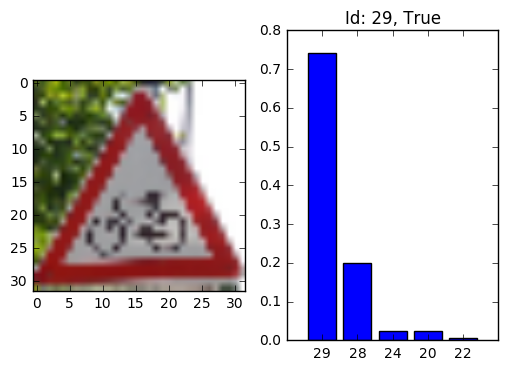

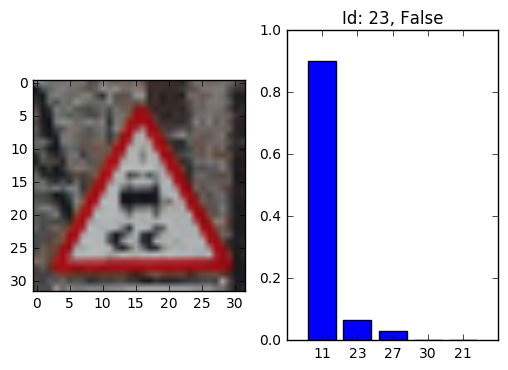

In [87]:
for i in range(number_test_images):
    plt.figure()
    plt.subplot(1,2,1)
    image = imagesTogether[i]
    plt.imshow(image)
    plt.subplot(1,2,2)
    probs = probabilities[0].values[i]
    indices = probabilities[0].indices[i]
    y_pos = np.arange(len(indices))
    plt.bar(y_pos, probs, align='center')
    plt.xticks(y_pos, indices)
    plt.title("Id: " + str(labels[i]) + ", " + str(predictions[0][i]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Many similar traffic signs (e.g. speed limits, warnings) are classified incorrectly, but the correct prediction does often occur in the first 3 predictions. 

A interesting exception is the 120km/h speed limit, which was classified as 20 km/h. 

Minor differences in sign design can make a difference in classification. A good example are the two Road Work images. One was correctly classified as road work, the other as pedestrians. The only obvious difference to the human eye is that the design is different which could cause a wrong classification.

The ice/snow warning was obscured and wrongly classified. The correct classification had the second highest probability though.

Most wrong classifications are intuitively understandable, I can see how the neural network might misunderstand the sign. A few wrong classifications on the other hand are impossible to understand - such as a No entry sign that was wrongly classified as a Yield sign.

There are many improvements I could make to my code which would hopefully make the predictions better.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.